# ELVTR Data Science Main Project

## Deliverables

### 01 Git Repository

Include all project code with a README file containing a high-level project description.

Example README guide: [Make a README](link-to-readme-guide)

### 02 Report

* Methodology, approach, and model selection rationale.
* Advantages and limitations of the chosen model.
* Architecture of the final solution.
* Considerations on deployment and scalability of the solution - i.e., how will the model be used in BAU by the business?
* Estimated impact/ROI of the project.

# Data Science in Finance: Lending Club Loan Analysis

## Project Overview

Lending Club has tasked us with preparing a loan application dataset for analysis and predictive modeling. 

The key tasks include data cleaning, exploratory data analysis, and building a predictive model for loan classification. An optional component involves building a real-time scoring application.

**Project Objectives**:
- Clean and preprocess the data.
- Perform exploratory data analysis (EDA) to gain insights.
- Develop a predictive model for loan application approval.
- (Optional) Build a real-time scoring application.

**Dataset Description**:
The dataset consists of loan application records, including various financial metrics and the application status. The data dictionary is provided for understanding the attributes.

**Dataset Path**:
- CSV: `data/1-raw/lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv`
- Data Dictionary: `data/1-raw/lending-club-2007-2020Q3/LCDataDictionary.xlsx`

In [3]:
pwd

'c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\notebooks'

## Importing Required Libraries


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Plot settings for consistent figure size (A4 landscape top half)
FIG_WIDTH = 11.69  # Width
FIG_HEIGHT = 4.14  # Height

# Set the theme for Seaborn plots
sns.set_theme(style='whitegrid')

## Load Data Set

In [5]:
# Load the data xlsx file as a dataframe
df = pd.read_csv("c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\data\\raw\\Loan_status_2007-2020Q3\\Loan_status_2007-2020Q3-100k-Full-Data.csv")

# Clean headers in the existing DataFrame 'df'
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Display cleaned headers
print("Cleaned headers:", df.columns.tolist())

df.shape

Cleaned headers: ['unnamed:_0.1', 'unnamed:_0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status

(100000, 143)

In [6]:
# Load the data dictionary CSV file as a dataframe
df_data_dict = pd.read_excel("c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\data\\raw\\Loan_status_2007-2020Q3\\LCDataDictionary.xlsx")

# Clean headers in the existing DataFrame 'df'
df_data_dict.columns = df_data_dict.columns.str.strip().str.lower().str.replace(" ", "_")

# Display cleaned headers
print("Cleaned headers:", df_data_dict.columns.tolist())

df_data_dict.shape

Cleaned headers: ['loanstatnew', 'description']


(153, 2)

In [7]:
# Copies the columns and descriptions from the data dictionary into a data frame for future recall.
# Initialize empty lists for LoanStatNew and Description
loanstatnew = []
description = []

# Iterate through each row in the DataFrame and populate lists
for _, row in df_data_dict.iterrows():
    loanstatnew.append(row['loanstatnew'])
    description.append(row['description'])

# Apply left-aligned styling to both headers and data cells
styled_df_data_dict = df_data_dict.style.set_properties(
    **{'text-align': 'left', 'white-space': 'nowrap'}
).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

# Display styled DataFrame
styled_df_data_dict


,loanstatnew,description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [8]:
#load the employtment mapping CSV file as a dataframe
df_emp_title = pd.read_csv("c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\data\\raw\\emp_title_mapping.csv")

# Clean headers in the existing DataFrame
df_emp_title.columns = df_emp_title.columns.str.strip().str.lower().str.replace(" ", "_")

# Display cleaned headers
print("Cleaned headers:", df_emp_title.columns.tolist())

df_emp_title.shape

Cleaned headers: ['job_title', 'category']


(91, 2)

After analysing our data dictionary it is possible to class our columns into figurative categories to better organise our analysis. 

These categories are, for now:

- Credit history, 
- Current Debt and Payment behaviours, 
- Employement, 
- Credit inquiries

Considering that scoring pertains to the availability of data pre loan application we'll exclude split our analysis into two categories known and unknown history. Unknown pertains to no antecident known pertains to existing difficulties.

The following fields suggest incidents, and indicators of exisint struggles:

`loan_status`, `out_prncp`, `out_prncp_inv`, `total_pymnt`, `total_rec_int`, `total_rec_late_fee`, `total_rec_prncp`

In [9]:
# Initialize empty lists for LoanStatNew and Description
jobtitle = []
job_category = []

# Iterate through each row in the DataFrame and populate lists
for _, row in df_emp_title.iterrows():
    jobtitle.append(row['job_title'])
    job_category.append(row['category'])

# Apply left-aligned styling to both headers and data cells
styled_df_emp_title = df_emp_title.style.set_properties(
    **{'text-align': 'left', 'white-space': 'nowrap'}
).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

# Display styled DataFrame
styled_df_emp_title

,job_title,category
0,web editor,Content/Media
1,route manager,Operations
2,quality manager,Quality Assurance
3,budget mgr,Finance
4,inspector,Quality Assurance
5,banesco usa,Other
6,mechanical design engineer,Engineering
7,mission assembly,Manufacturing
8,authorization specialist/referral assist,Healthcare
9,registered nurse,Healthcare


In [10]:
# Cross table on 'category' in df_emp_title
category_crosstab = pd.crosstab(index=df_emp_title['category'], columns='count').sort_values(by='count', ascending=False)

# Display the crosstab
category_crosstab

col_0,count
category,
Healthcare,10
Executive,7
IT/Technology,6
Education,6
Other,5
Operations,5
Finance,5
Administrative,5
Technical Support,4


## Display Basic Data Discovery

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 143 entries, unnamed:_0.1 to debt_settlement_flag
dtypes: float64(91), int64(18), object(34)
memory usage: 109.1+ MB


Our data contains 143 columns and 99999 rows of data. It is comprised of numerical (float, int) and categorical data (object)

In [12]:
df.head()

,unnamed:_0.1,unnamed:_0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000,4000,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-20,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1,Dec-04,665,669,0,19.0,110.0,4,1,1988,82.80%,12,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-20,134.93,Jun-20,May-20,669,665,1.0,NaN,1,Individual,NaN,NaN,NaN,0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000,24000,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-16,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0,Jan-04,680,684,0,NaN,NaN,10,0,22697,64.50%,24,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-20,500.07,Jun-20,May-20,704,700,0.0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000,5000,5000.0,36 months,10.49%,162.49,B,B3,driver,10+ years,MORTGAGE,55000.0,Not Verified,Jan-15,Fully Paid,n,https://lendingclub.com/

Let's remove the first two columns but keep id for future reference. We've renamed our df to df_dropped in the process.

In [13]:
# Remove specified columns from df
#df = df.drop(df.columns[[0, 1]], axis=1) # remove by index number, good for quick changes but hard to keep track of edits. Keeping for records.
df_dropped = df.drop(columns=['unnamed:_0.1', 'unnamed:_0'])


# Display the updated DataFrame
df_dropped.head()[df_dropped.columns[:3]]

,id,loan_amnt,funded_amnt
0,167338079,4000,4000
1,71016917,24000,24000
2,39589826,5000,5000
3,134798709,24000,24000
4,127097355,14000,14000


The first two columns have been removed succesfully.

In [14]:
df_dropped.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,99898.000000,100000.00000,100000.000000,100000.000000,100000.000000,47186.000000,14630.000000,100000.000000,100000.00000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99994.000000,24602.000000,100000.0,7.166000e+03,7166.000000,100000.000000,97562.000000,9.756200e+04,70356.000000,70356.000000,70356.000000,70356.000000,68227.000000,70356.000000,60315.000000,70356.000000,70356.000000,70356.000000,70343.000000,9.756200e+04,70356.000000,70356.000000,70356.000000,98222.000000,97560.000000,97152.000000,97101.000000,99994.00000,100000.000000,94627.000000,97562.000000,97562.000000,97562.000000,98222.000000,97212.000000,21943.000000,87190.000000,31658.000000,97562.000000,97562.000000,97562.000000,97949.000000,97562.000000,97562.000000,97562.000000,97562.000000,97562.000000,97949.000000,94488.000000,97562.000000,97562.000000,97562.000000,97558.000000,97133.000000,99955.000000,99995.000000,9.756200e+04,9.822200e+04,98222.000000,9.756200e+04,6739.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6613.000000,6740.000000,6740.000000,6740.000000,6740.000000,4895.000000,6222.000000,4895.000000,4895.000000,6127.000000,6222.000000,6222.000000
mean,9.789485e+07,15332.373000,15328.216250,15313.244829,451.708510,8.002918e+04,19.332252,0.28473,700.639200,704.639440,0.554310,35.034269,74.945113,11.688690,0.17770,1.689349e+04,24.040390,4032.024853,4031.436341,12559.494957,12544.530188,9911.414064,2479.307829,1.750509,167.022522,28.605125,3512.909843,690.476220,677.660400,0.017651,44.633322,1.0,1.295764e+05,19.408330,0.003460,208.056907,1.459264e+05,0.928037,2.839175,0.703906,1.616351,20.323259,36927.159276,68.988842,1.250881,2.645076,5999.964339,56.154116,3.639794e+04,1.075232,1.517497,1.998707,4.512166,13757.234143,12779.260859,55.838138,0.00821,10.706750,125.750589,179.950237,14.462444,8.325342,1.507839,25.101726,39.344392,7.094151,36.186525,0.483631,3.702671,5.594074,4.858508,7.635350,8.558486,8.266138,13.785039,5.550563,11.699834,0.000445,0.002306,0.075306,2.080523,94.356537,4

Let's start by converting our data into lists for further processing.

In [15]:
def split_data_frame(features_list, df):
    """
    Splits the provided DataFrame into three lists containing Boolean, Numerical, and Categorical column names.
    Converts floats with trailing zeros into integers where appropriate and replaces NaN values 
    with 0 for integers and 0.00 for floats.

    Parameters:
    features_list (list): List of column names to be checked.
    df (pd.DataFrame): The input DataFrame to split.

    Returns:
    tuple: A tuple containing three lists (boolean_cols, numerical_cols, categorical_cols).
    """
    boolean_cols, numerical_cols, categorical_cols = [], [], []

    # Define acceptable boolean values
    acceptable_boolean_values = {0, 1, True, False, 0.0, 1.0}

    # Helper function to classify column types
    def classify_column(col):
        if col not in df.columns:
            print(f"Warning: Column '{col}' not found in DataFrame.")
            return

        column_series = df[col]

        # Classify Boolean columns
        if pd.api.types.is_bool_dtype(column_series) or all(column_series.dropna().isin(acceptable_boolean_values)):
            boolean_cols.append(col)
        
        # Classify Numerical columns
        elif pd.api.types.is_numeric_dtype(column_series):
            if column_series.dtype == 'float64' and all(column_series.dropna() == column_series.dropna().astype(int)):
                df[col] = column_series.fillna(0).astype(int)
            else:
                df[col] = column_series.fillna(0 if column_series.dtype == 'int64' else 0.00)
            numerical_cols.append(col)
        
        # Classify Categorical columns
        else:
            categorical_cols.append(col)

    # Iterate over each feature to classify
    for col in features_list:
        classify_column(col)

    # Print a summary of column counts
    print(f"Summary of column counts:")
    print(f"Boolean columns: {len(boolean_cols)}")
    print(f"Numerical columns: {len(numerical_cols)}")
    print(f"Categorical columns: {len(categorical_cols)}")
    print(f"Total features processed: {len(features_list)}")

    return boolean_cols, numerical_cols, categorical_cols

# Example usage:
# boolean_list, numerical_list, categorical_list = split_data_frame(new_features, df)


##### Numerical Processing

In [16]:
def analyze_numeric_columns(numeric_cols, dataframe):
    """
    Analyze and visualize numeric columns in a DataFrame.

    Parameters:
    numeric_cols (list): List of numeric column names to analyze.
    dataframe (pd.DataFrame): The DataFrame containing the data.
    """
    for column in numeric_cols:
        print(f"\nSummary Statistics and Analysis for Numeric Column: {column}")

        # Check if the column exists in the DataFrame
        if column not in dataframe.columns:
            print(f"Column '{column}' is not found in the DataFrame. Skipping...")
            continue

        # Ensure the column is converted to numeric
        dataframe.loc[:, column] = pd.to_numeric(dataframe[column], errors='coerce')

        # Drop NaN values to ensure we have numeric data for analysis
        numeric_data = dataframe[column].dropna()

        if numeric_data.empty:
            print(f"No valid numeric data available for column: {column}. Skipping...")
            continue  # Skip the column if there's no valid data

        # Calculate z-scores
        z_scores = (numeric_data - numeric_data.mean()) / numeric_data.std()

        # Calculate IQR
        Q1 = numeric_data.quantile(0.25)
        Q3 = numeric_data.quantile(0.75)
        IQR = Q3 - Q1

        # Identify outliers based on z-scores (z > 3 or z < -3)
        outliers_z = numeric_data[(z_scores > 3) | (z_scores < -3)]

        # Identify outliers based on IQR
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_iqr = numeric_data[(numeric_data < lower_bound) | (numeric_data > upper_bound)]

        # Create a figure for the distribution and box plot
        fig, axs = plt.subplots(1, 2, figsize=(FIG_WIDTH, FIG_HEIGHT))

        # Distribution plot (histogram)
        sns.histplot(numeric_data, kde=True, bins=10, ax=axs[0])
        axs[0].set_title(f'Distribution of {column}')
        axs[0].set_xlabel(column)
        axs[0].set_ylabel('Frequency')

        # Box plot for outlier detection
        sns.boxplot(x=numeric_data, ax=axs[1])
        axs[1].set_title(f'Box Plot for {column} (Outlier Detection)')
        axs[1].set_xlabel(column)

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

        # Summary Statistics
        print(f"\nSummary Statistics for Numeric Column '{column}':")
        print(numeric_data.describe())

        # Interquartile Range (IQR)
        print(f"\nInterquartile Range (IQR): {IQR:.4f}")
        print(f"Lower Bound for Outliers (IQR method): {lower_bound:.4f}")
        print(f"Upper Bound for Outliers (IQR method): {upper_bound:.4f}")
        print(f"Number of Outliers (IQR method): {len(outliers_iqr)}")

        # Display outliers based on IQR
        #if not outliers_iqr.empty:
        #    print("\nOutliers detected using the IQR method:")
        #    print(outliers_iqr)
        #else:
        #    print("\nNo outliers detected using the IQR method.")

        # Z-scores
        print("\nZ-score Summary:")
        print(z_scores.describe())

        print(f"\nNumber of Outliers (Z-score method): {len(outliers_z)}")

        # Display outliers based on Z-scores
        #if not outliers_z.empty:
        #    print("\nOutliers detected using the Z-score method:")
        #    print(outliers_z)
        #else:
        #    print("\nNo outliers detected using the Z-score method.")

        # Skewness
        skewness_value = skew(numeric_data)
        print(f"\nSkewness: {skewness_value:.4f}")

        # Normality Tests
        print("\nNormality Tests:")
        # D'Agostino's K^2 Test
        k2_stat, k2_p = normaltest(numeric_data)
        print(f"D'Agostino's K^2 Test: Statistic={k2_stat:.4f}, p-value={k2_p:.4f}")

        # Shapiro-Wilk Test
        shapiro_stat, shapiro_p = shapiro(numeric_data)
        print(f"Shapiro-Wilk Test: Statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

        # Anderson-Darling Test
        anderson_result = anderson(numeric_data)
        print(f"Anderson-Darling Test: Statistic={anderson_result.statistic:.4f}")
        for i in range(len(anderson_result.critical_values)):
            sl, cv = anderson_result.significance_level[i], anderson_result.critical_values[i]
            if anderson_result.statistic < cv:
                result = "Accept"
            else:
                result = "Reject"
            print(f"At {sl}% significance level, critical value: {cv:.4f}, {result} the null hypothesis of normality")

        # Kolmogorov-Smirnov Test against normal distribution
        # ks_stat, ks_p = kstest(numeric_data, 'norm', args=(numeric_data.mean(), numeric_data.std()))
        # print(f"Kolmogorov-Smirnov Test: Statistic={ks_stat:.4f}, p-value={ks_p:.4f}")


##### Boolean Processing

In [17]:
def analyze_boolean_columns(boolean_cols, dataframe):
    """
    Analyze and visualize boolean columns in a DataFrame.

    Parameters:
    boolean_cols (list): List of boolean column names to analyze.
    dataframe (pd.DataFrame): The DataFrame containing the data.
    """
    for column in boolean_cols:
        print(f"\nSummary Statistics and Analysis for Boolean Column: {column}")

        # Check if the column exists in the DataFrame
        if column not in dataframe.columns:
            print(f"Column '{column}' is not found in the DataFrame. Skipping...")
            continue

        # Cast the column to boolean in case it contains 1/0 or other non-boolean values
        dataframe[column] = dataframe[column].astype(bool)

        # Prepare boolean counts
        boolean_counts = dataframe[column].value_counts()

        # Create a figure with two subplots
        fig, axs = plt.subplots(1, 2, figsize=(FIG_WIDTH, FIG_HEIGHT)) # Configured at the beginning of the file for image consistancy

        # Bar plot using 'x' parameter
        sns.countplot(
            x=column,
            data=dataframe,
            ax=axs[0]
        )
        axs[0].set_title(f'Boolean Distribution for {column}')
        axs[0].set_xlabel(column)
        axs[0].set_ylabel('Count')

        # Pie chart on the right subplot
        boolean_counts.plot.pie(
            autopct='%1.1f%%',
            ax=axs[1],
            startangle=90
        )
        axs[1].set_title(f'Proportion of True/False for {column}')
        axs[1].set_ylabel('')

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

        # Display summary statistics for boolean data
        print(f"\nSummary for Boolean Column '{column}':")
        true_count = boolean_counts.get(True, 0)
        false_count = boolean_counts.get(False, 0)
        total_count = true_count + false_count
        true_percentage = (true_count / total_count) * 100 if total_count > 0 else 0

        print(f"Count of True: {true_count}")
        print(f"Count of False: {false_count}")
        print(f"Percentage of True: {true_percentage:.2f}%")


##### Categorical Processing

In [18]:
def analyze_categorical_columns(categorical_cols, dataframe):
    """
    Analyze and visualize categorical columns in a DataFrame.

    Parameters:
    categorical_cols (list): List of categorical column names to analyze.
    dataframe (pd.DataFrame): The DataFrame containing the data.
    """
    for column in categorical_cols:
        print(f"\nSummary Statistics and Analysis for Categorical Column: {column}")

        # Check if the column exists in the DataFrame
        if column not in dataframe.columns:
            print(f"Column '{column}' is not found in the DataFrame. Skipping...")
            continue

        # Prepare category counts and percentages
        category_counts = dataframe[column].value_counts()
        category_percentages = dataframe[column].value_counts(normalize=True) * 100

        # Display bar plot and pie chart
        fig, axs = plt.subplots(1, 2, figsize=(FIG_WIDTH, FIG_HEIGHT))

        # Bar plot using 'x' parameter
        sns.countplot(
            x=column,
            data=dataframe,
            ax=axs[0]
        )
        axs[0].set_title(f'Frequency Distribution for {column} (Categorical Data)')
        axs[0].set_xlabel(column)
        axs[0].set_ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')

        # Pie chart on the right subplot
        category_counts.plot.pie(
            autopct='%1.1f%%',
            ax=axs[1],
            title=f'Proportion of Categories for {column}',
            startangle=90
        )
        axs[1].set_ylabel('')

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

        print(f"\nFrequency Table for '{column}':")
        freq_table = pd.DataFrame({'Count': category_counts, 'Percentage': category_percentages})
        print(freq_table)


In [19]:
# Create lists of data for further analysis
boolean_list, numerical_list, categorical_list = split_data_frame(df_dropped, df_dropped) # first input variable is the features we're interested in the second the data frame that contains the values.

Summary of column counts:
Boolean columns: 1
Numerical columns: 106
Categorical columns: 34
Total features processed: 100000


### 01 Data Preparation and Cleaning

Perform thorough data cleaning on the provided dataset, including but not limited to the following steps:

* Handling missing values (imputation or removal)
* Converting data types to appropriate formats
* Removing duplicate records
* Detecting and handling outliers
* Standardizing and normalizing data
* Encoding categorical variables
* Cleaning and preprocessing string data
* Extracting features from date columns

In [20]:
# Cross table of data types in df
dtype_crosstab = df.dtypes.value_counts().reset_index()
dtype_crosstab.columns = ['Data Type', 'Count']

# Display the cross table
dtype_crosstab

,Data Type,Count
0,float64,91
1,object,34
2,int64,18


This calls the split_data_frame function above create three lists to capture the sorting outputs in. 

These will later be used to pull some graphs to evaluate the data and what possible transformations we've missed.


#### Handling missing values (imputation or removal)

Let's import missingno

In [21]:
import missingno as msno

Let's check for missing data using missingno

In [22]:
# Check for missing values in each column
missing_values = df_dropped.isnull().sum().sort_values(ascending=False)
print(f"There is a total of: {len(missing_values)} columns that are missing data\n")

missing_values[missing_values > 0] # Display only columns with missing values > X

There is a total of: 141 columns that are missing data



hardship_loan_status         95116
hardship_status              95105
hardship_type                95105
payment_plan_start_date      95105
hardship_end_date            95105
hardship_start_date          95105
hardship_reason              95105
verification_status_joint    93369
sec_app_earliest_cr_line     93260
next_pymnt_d                 63573
emp_title                     8954
emp_length                    6950
hardship_flag                 1327
title                          780
last_pymnt_d                   191
revol_util                      81
last_credit_pull_d               2
dtype: int64

Looking at our results we can make the assumption that several columns are derivatives or linked in some shape or form to others due to the exact count of missing data.

Data Missing Values



<Axes: >

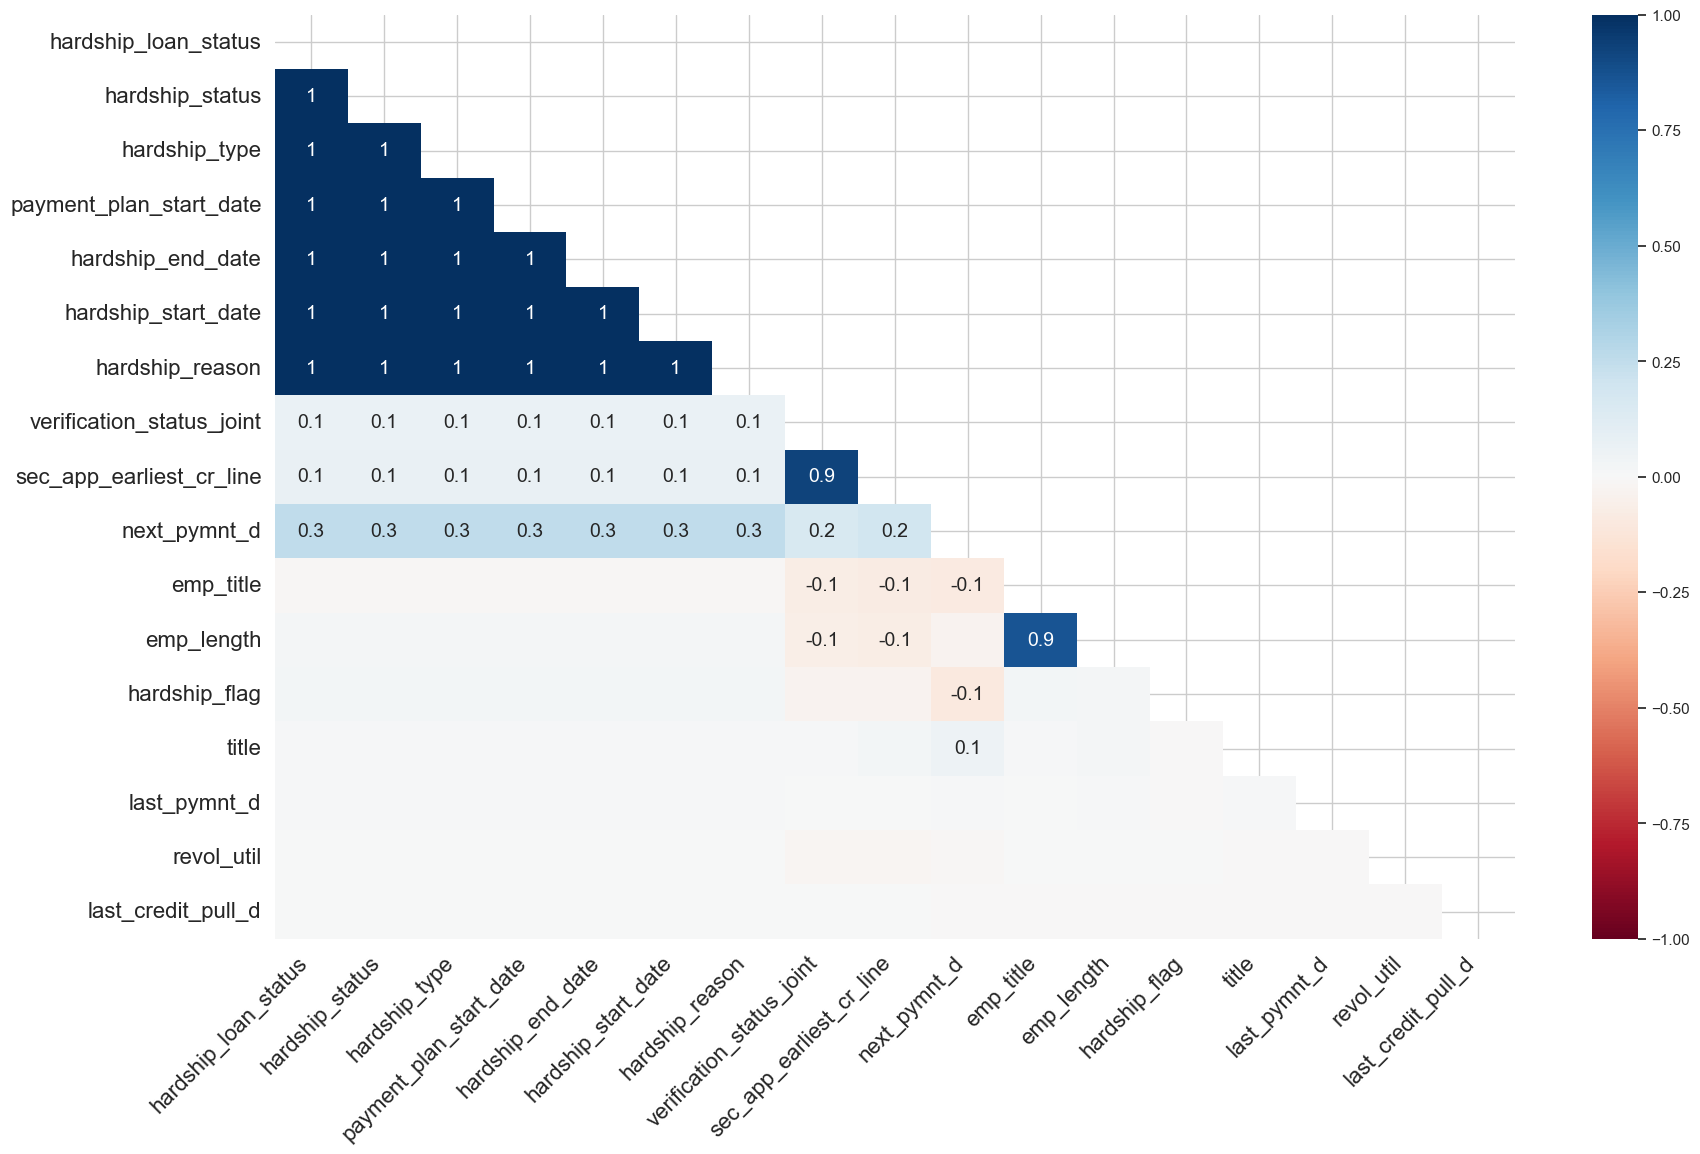

In [23]:
# Filter for columns with missing values greater than 0
missing_values_graph = df_dropped[missing_values[missing_values > 0].index]

print("Data Missing Values\n")

# Visualize the missing data using the missingno library
msno.heatmap(missing_values_graph)
# msno.dendrogram(missing_values_graph) #removed for the final anlysis to avoid cluttering the document with the same data but a different way to show it

In [24]:
df_dropped['hardship_status'].value_counts()

hardship_status
ACTIVE       4166
COMPLETE      401
COMPLETED     226
BROKEN        102
Name: count, dtype: int64

Let's align the wording.

In [25]:
# Correct references to 'completed' to 'complete' in the 'hardship_status' column
df_dropped['hardship_status'] = df_dropped['hardship_status'].replace('COMPLETED', 'COMPLETE')

In [26]:
df_dropped['hardship_status'].value_counts()

hardship_status
ACTIVE      4166
COMPLETE     627
BROKEN       102
Name: count, dtype: int64

Let's create our marker using the `hardship_status`  and default to active and broken = 1 or non active = 0.

In [27]:
# Create the 'hardship_existing' column, setting it to 1 if 'hardship_status' is 'active' or 'broken', otherwise 0
df_dropped['hardship_existing'] = df_dropped['hardship_status'].apply(lambda x: 1 if x in ['active', 'broken'] else 0)

# Display the first few rows to verify the changes
print(df_dropped[['hardship_status', 'hardship_existing']].head())


  hardship_status  hardship_existing
0             NaN                  0
1             NaN                  0
2             NaN                  0
3             NaN                  0
4             NaN                  0


C:\Users\kiera\AppData\Local\Temp\ipykernel_13012\1601444245.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dropped['hardship_existing'] = df_dropped['hardship_status'].apply(lambda x: 1 if x in ['active', 'broken'] else 0)


In [28]:
df_dropped['application_type'].value_counts()

application_type
Individual    92834
Joint App      7166
Name: count, dtype: int64

In [29]:
# Create the 'hardship_existing' column, setting it to 1 if 'hardship_status' is 'active' or 'broken', otherwise 0
df_dropped['joint_applicant'] = df_dropped['dti_joint'].apply(lambda x: 1 if x in ['Joint App'] else 0)

# Display the first few rows to verify the changes
print(df_dropped[['joint_applicant', 'dti_joint']].head())

   joint_applicant  dti_joint
0                0        0.0
1                0        0.0
2                0        0.0
3                0        0.0
4                0        0.0


C:\Users\kiera\AppData\Local\Temp\ipykernel_13012\1427595312.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dropped['joint_applicant'] = df_dropped['dti_joint'].apply(lambda x: 1 if x in ['Joint App'] else 0)


Let's plot our missing data and search for possible correlations.

##### Missing Data Strategy
Instead of dropping columns with a high number of missing values, we may want to retain them for our analysis. 

Following the logic of Abraham Wald's famous airplane and bullet hole logic, it is beneficial to analyse the data we don't have rather than discard potentially useful data i.e. the absence of one is a indicator in its own right.

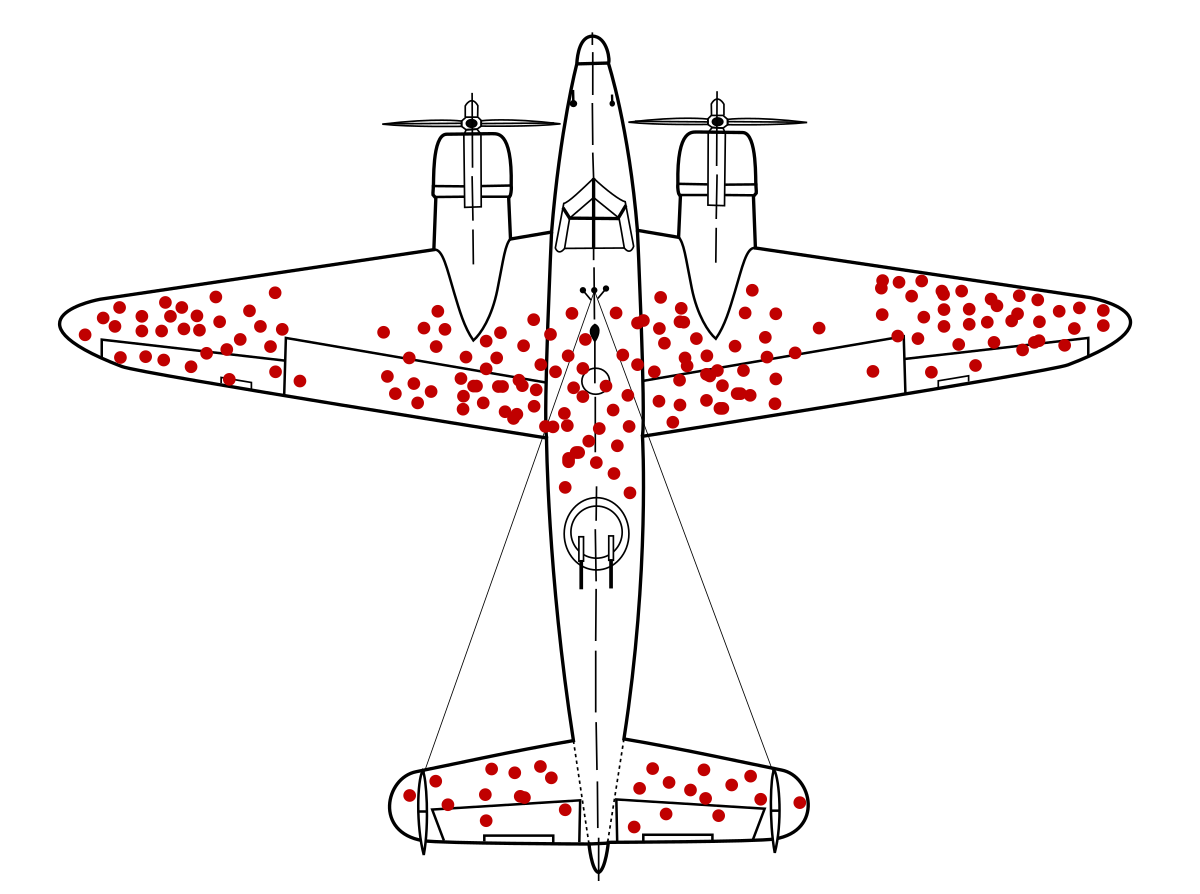

##### Creating Missing Value Indicators

To reiterate instead of dropping columns or rows with missing data, we create missing value indicators for the columns with missing entries that we feel would be good indicators/features for loan application approvals.

This means that for each column with missing values, a new binary indicator column is created, where `1` represents a missing value and `0` indicates that a value was present. 

This approach ensures that we retain as much information as possible from the original dataset while also capturing the fact that missing values themselves may provide valuable insight. For instance, missing income information could be an indicator of a higher default risk and by proxy maybe something that should reduce the score attributed to a client.

#### Converting data types to appropriate formats

Let's start by calling our split_list_function which will create three seperate lists from our data frame which we can then use for our analysis.

In [30]:
# Create lists of data for further analysis
boolean_list, numerical_list, categorical_list = split_data_frame(df_dropped, df_dropped) # first input variable is the features we're interested in the second the data frame that contains the values.

Summary of column counts:
Boolean columns: 3
Numerical columns: 106
Categorical columns: 34
Total features processed: 100000


: 

Here wer can see that our data contains 3 boolean values. 2 of which we created earlier as markers for active hardship and joint applications.

#### Removing duplicate records

#### Detecting and handling outliers

Let's run our numerical data analysis.

#### Standardising and normalising data

#### Encoding categorical variables

Let's inspect our categorical data for encoding opportunities. Before running our graphs let's look at the unique value count in our list.

In [2]:
for column in categorical_list:
    unique_values = df_dropped[column].nunique()
    print(f"Column '{column}' has {unique_values} unique values.")

NameError: name 'categorical_list' is not defined


Summary Statistics and Analysis for Categorical Column: term


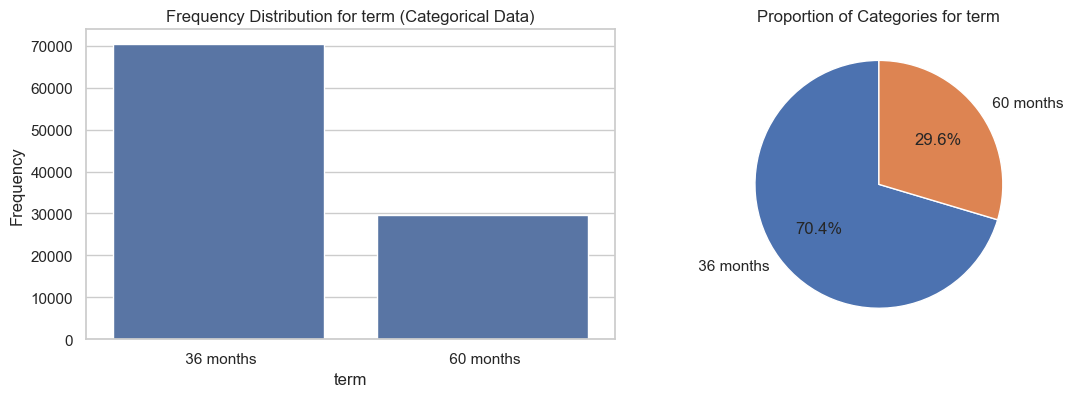


Frequency Table for 'term':
           Count  Percentage
term                        
36 months  70384      70.384
60 months  29616      29.616

Summary Statistics and Analysis for Categorical Column: int_rate


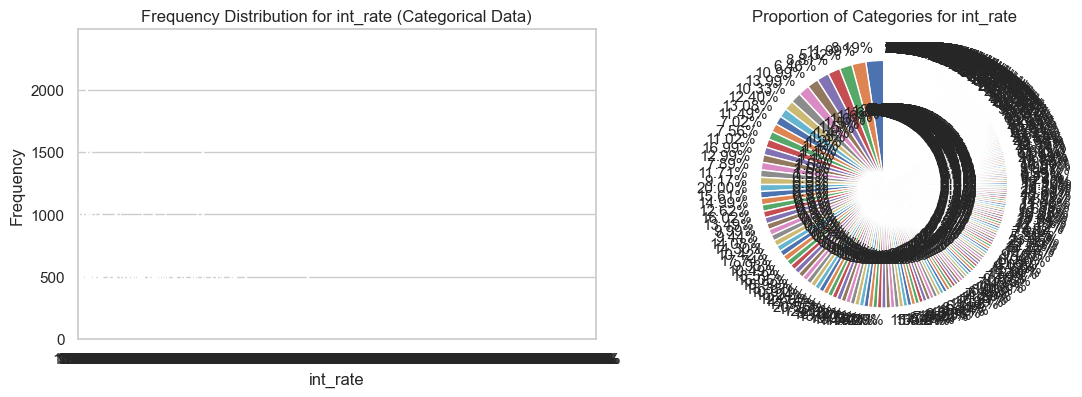


Frequency Table for 'int_rate':
          Count  Percentage
int_rate                   
8.19%      2365       2.365
11.99%     1841       1.841
5.32%      1650       1.650
8.81%      1611       1.611
6.46%      1591       1.591
10.99%     1476       1.476
13.99%     1465       1.465
10.33%     1369       1.369
12.40%     1254       1.254
13.08%     1176       1.176
11.49%     1121       1.121
7.02%      1100       1.100
7.56%      1076       1.076
11.02%     1070       1.070
16.99%     1016       1.016
12.99%      993       0.993
7.89%       988       0.988
11.71%      945       0.945
9.17%       938       0.938
20.00%      894       0.894
15.61%      891       0.891
14.99%      858       0.858
12.62%      848       0.848
16.02%      839       0.839
13.49%      821       0.821
9.99%       794       0.794
9.44%       791       0.791
14.08%      786       0.786
14.30%      783       0.783
10.42%      769       0.769
17.74%      767       0.767
9.93%       760       0.760
10.49%      757

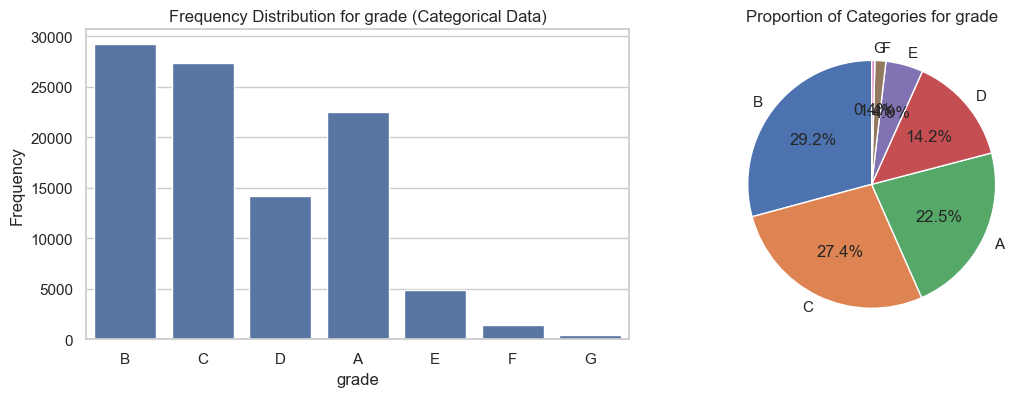


Frequency Table for 'grade':
       Count  Percentage
grade                   
B      29216      29.216
C      27400      27.400
A      22457      22.457
D      14212      14.212
E       4872       4.872
F       1423       1.423
G        420       0.420

Summary Statistics and Analysis for Categorical Column: sub_grade


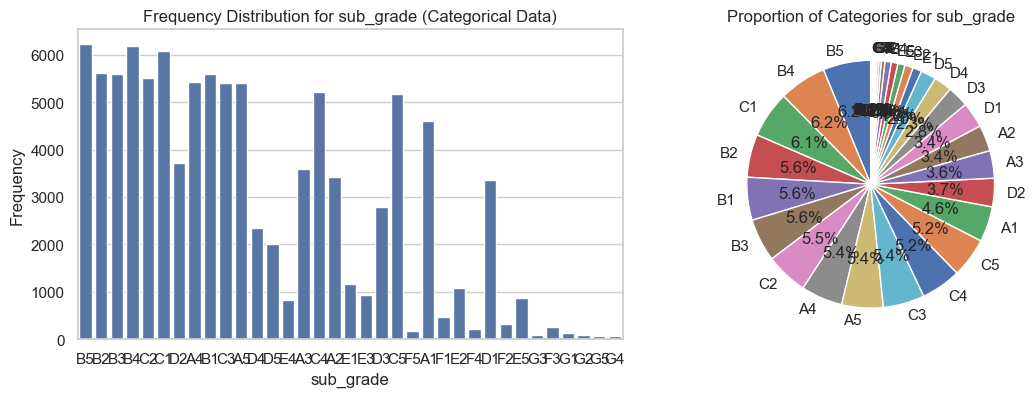


Frequency Table for 'sub_grade':
           Count  Percentage
sub_grade                   
B5          6225       6.225
B4          6187       6.187
C1          6075       6.075
B2          5609       5.609
B1          5599       5.599
B3          5596       5.596
C2          5513       5.513
A4          5426       5.426
A5          5415       5.415
C3          5410       5.410
C4          5223       5.223
C5          5179       5.179
A1          4610       4.610
D2          3720       3.720
A3          3593       3.593
A2          3413       3.413
D1          3358       3.358
D3          2788       2.788
D4          2344       2.344
D5          2002       2.002
E1          1168       1.168
E2          1083       1.083
E3           932       0.932
E5           868       0.868
E4           821       0.821
F1           471       0.471
F2           310       0.310
F3           250       0.250
F4           212       0.212
F5           180       0.180
G1           134       0.134
G2       

C:\Users\kiera\AppData\Local\Temp\ipykernel_13012\4220447071.py:45: UserWarning: Glyph 131 (\x83) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kiera\AppData\Local\Temp\ipykernel_13012\4220447071.py:45: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
analyze_categorical_columns(categorical_list, df_dropped)

##### Convert to float & int

- **emp_length**: Convert to a float (create a new feature `emp_length_clean_kn`)
- **int_rate**: Convert to a float (create a new feature `int_rate_int_clean_kn`)
- **revol_util**: Convert to a float (create a new feature `revol_util_int_clean_kn`)

Before making these changes let's create a copy of our df.

In [1]:
df_clean = df_dropped.copy()

NameError: name 'df_dropped' is not defined

##### Emp_length conversion

In [ ]:
# Extract numerical values from 'emp_length' and convert it to an integer
df_clean['emp_length'] = df_dropped['emp_length'].str.extract(r'(\d+)').astype(float).fillna(0).astype(int)



#### Cleaning and preprocessing string data

Let's check for multicollinenearity

In [ ]:
# Calculate the correlation matrix for numerical columns
corr_matrix = df_dropped[numerical_list].corr().abs()

# Set the threshold for high correlation
threshold = 0.90

# Find pairs of features with correlation greater than the threshold
high_corr_pairs = np.where(corr_matrix > threshold)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y])
                   for x, y in zip(*high_corr_pairs) if x != y and x < y]

# Display the pairs with high correlation
for pair in high_corr_pairs:
    print(f"Correlation between {pair[0]} and {pair[1]}: {corr_matrix.loc[pair[0], pair[1]]:.2f}")

#### Extracting features from date columns using RFE

#### Preliminary Data Feature selection

## 02 Exploratory Data Analysis

Conduct an in-depth analysis of the dataset with a focus on the target variable. The analysis should include:

* Exploring the distribution, symmetry, and potential issues with the target variable.
* Using visualization techniques (e.g., histograms, box plots, scatter plots) and statistical analysis to explore relationships between the target variable and independent variables.
* Identifying important variables with predictive relevance.
* Determining which variables or levels can be excluded.
* Identifying variables with outliers and applying transformations if necessary.
* Handling missing values and explaining the chosen treatment.
* Examining interrelationships between independent variables and considering transformations.
* Assessing class balance and addressing any imbalance if needed.
* Summarizing insights and plans to leverage the information.

Our Target variable is `loan_approval_score`

In [2]:
df_dropped['loan_approval_score'] = []

NameError: name 'df_dropped' is not defined

#### Exploring the Distribution, Symmetry, and Potential Issues with the Target Variable

#### Using Visualization Techniques to Explore Relationships Between the Target Variable and Independent Variables

#### Identifying Important Variables with Predictive Relevance (RFE)

#### Determining Which Variables or Levels Can Be Excluded

#### Identifying Variables with Outliers and Applying Transformations if Necessary

#### Handling Missing Values and Explaining the Chosen Treatment

#### Examining Interrelationships Between Independent Variables and Considering Transformations

#### Assessing Class Balance and Addressing Any Imbalance if Needed

#### Summarizing Insights and Plans to Leverage the Information

### 03 Modelling

Recommend and justify a model to predict class membership of loan applications. The modeling phase should include:

* Selecting a baseline model for comparison.
* Recommending a challenger model with a detailed justification.
* Describing all data preprocessing steps and measurement of accuracy.
* Choosing appropriate models and evaluation metrics.
* Explaining the choice of models, preprocessing methods, and accuracy metrics.

### 04 Optional - Real-time scoring application

Build a "real-time" application that can score new loan application observations. The implementation details are at the consultant's discretion.